#  DATA ANALYTICS AND PREDICTION OF NSW HOUSE PRICE

**Project Owner: Brian Ong**
Sydney, 7th May 2023

I.	Introduction

1.	Overview of the Project:
The real estate industry remains one of the most attractive sectors for both investors and homebuyers, as owning property—whether as an investment or a family home—is a widely shared aspiration. Domain, one of the leading companies in the real estate market, has experienced significant growth, particularly with property prices climbing dramatically in recent years. Real estate encompasses various property types, including houses, apartments, and vacant land, and its trends often reflect the broader economic conditions of a country. Understanding these shifts is key, and my house price prediction project, focusing on Domain's data, aims to shed light on these developments and forecast future market behavior.

2.	Objectives of the Project and Define the problem
* What is the trend and future of real estate market;
* What kind of real estate dominate the whole industries;
* What is the average price of properties by segment through years (2016-2021);
* Which suburb is the most attractive with homebuyer and investor based on price per square;
* How the suburb factor impact on housing price (distance from CBD, median income, population and elevation);
* How the property factor impact on housing price (number of bedroom, bathroom, carpark);
* Which areas have the highest concentration of sold properties;
* Is linear regression the most suitable model for predicting house sales, or is there another model that demonstrates greater predictive accuracy;


II.	Data Collection and Preprocessing
1.	Data Source:

    First Dataset: 
www.kaggle.com/datasets/alexlau203/sydney-house-prices
    
    Second Dataset: 
www.kaggle.com/datasets/karltse/sydney-suburbs-reviews

2.	Data Loading:

In [28]:
pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\UOW\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import datetime as dt
import statistics
import missingno as msno
import seaborn as sns 
import plotly.graph_objects as go # map
import plotly.express as px 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.axes as axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec # multiple plots
from matplotlib.colors import LinearSegmentedColormap
colors_palette={'#312783', '#0069B4','#24AFE7','#0085AC','#006C6F','#006A32','#799E1A','#94C11F','#D3D800','#FFED00'}

In [30]:
# LOADING DATA
dataset1 = pd.read_csv(r'D:\Personal Work\Portfolio Project\House_Analysis_And_Prediction\domain_properties.csv')

#Create a copy of dataset to working on
domain_df=dataset1.copy()

#Display all columns of dataset
pd.set_option('display.max_columns', None)
domain_df.head(3)

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59


Data Explaination
1. **Price**: Price of the house. Data type: `int64`.

2. **Date Sold**: Date when the house was sold. Data type: `object`.

3. **Suburb**: Suburb where the house is located. Data type: `object`.

4. **Number of Bathrooms**: Number of bathrooms in the house. Data type: `int64`.

5. **Number of Bedrooms**: Number of bedrooms in the house. Data type: `int64`.

6. **Number of Parking Spaces**: Number of parking spaces associated with the house. Data type: `int64`.

7. **Property Size**: Size of the property in square meters. Data type: `int64`.

8. **Type**: Type of the property (e.g., house, apartment). Data type: `object`.

9. **Suburb Population**: Population of the suburb where the house is located. Data type: `int64`.

10. **Suburb Median Income**: Median income of residents in the suburb. Data type: `int64`.

11. **Suburb Area (Square Kilometers)**: Area of the suburb in square kilometers. Data type: `float64`.

12. **Suburb Latitude**: Latitude coordinate of the suburb. Data type: `float64`.

13. **Suburb Longitude**: Longitude coordinate of the suburb. Data type: `float64`.

14. **Suburb Elevation**: Elevation of the suburb. Data type: `int64`.

15. **Cash Rate**: Cash rate, representing the interest rate set by the Reserve Bank of Australia. Data type: `float64`.

16. **Property Inflation Index**: Index representing inflation in property prices. Data type: `float64`.

17. **Distance from CBD (Kilometers)**: Distance from the Central Business District (CBD) in kilometers. Data type: `float64`.


III.	Exploratory Data Analysis (EDA)
1. Summary Statistics

In [31]:
domain_df.describe()

,price,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
count,1.116000e+04,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,1.675395e+06,2.073566,3.758961,2.017473,723.012366,9311.560036,40168.243369,5.054877,-33.781413,151.096676,55.606720,0.631361,188.489686,27.381826
std,1.290371e+06,1.184881,1.559743,1.454560,1048.983662,7541.636246,11089.955120,5.824663,0.202478,0.213456,52.802315,0.658624,24.441552,18.470113
min,2.250000e+05,0.000000,0.000000,0.000000,7.000000,22.000000,14248.000000,0.089000,-34.106240,150.553840,0.000000,0.100000,150.900000,0.310000
25%,1.002000e+06,1.000000,3.000000,1.000000,430.000000,3977.000000,32448.000000,1.776000,-33.921480,150.951020,21.000000,0.100000,167.600000,12.960000
50%,1.388000e+06,2.000000,4.000000,2.000000,600.000000,7457.000000,39104.000000,3.566000,-33.809180,151.109470,40.000000,0.110000,176.600000,22.310000
75%,2.020000e+06,3.000000,4.000000,2.000000,765.000000,12158.250000,45552.000000,6.568000,-33.715510,151.227810,75.000000,1.500000,220.100000,40.990000
max,6.000000e+07,46.000000,47.000000,50.000000,59100.000000,47176.000000,97500.000000,87.154000,-33.163760,151.573300,405.000000,2.000000,220.100000,84.790000


2. Data Cleaning and Datatype Modification

- Identify Duplicate and Handle Missing Data

In [32]:
# CHECK DUPLICATE AND NULL DATA
domain_df.drop_duplicates()

#Replace all +/-infinite data by null value to double check invalid data
domain_df.replace([np.inf, -np.inf], np.nan, inplace=True)
domain_df.isna().sum()

price                       0
date_sold                   0
suburb                      0
num_bath                    0
num_bed                     0
num_parking                 0
property_size               0
type                        0
suburb_population           0
suburb_median_income        0
suburb_sqkm                 0
suburb_lat                  0
suburb_lng                  0
suburb_elevation            0
cash_rate                   0
property_inflation_index    0
km_from_cbd                 0
dtype: int64

- Datatype Convertion

In [33]:
#EXPLORING FEATURE
domain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int64  
 14  cash_r

In [34]:
# DATA CONVERTION AND FEATURE ANALYSIS

#convert string datatype of date_sold to datetime
domain_df['date_sold']=pd.to_datetime(domain_df['date_sold'])

#Add price per square to have a better objective view of housing price
domain_df['price_per_square']=round((domain_df['price']/domain_df['property_size']),1)

#Add suburb population per km2 reveal ratio of population and size of suburb
domain_df['suburb_population_per_km2']=round((domain_df['suburb_population']/(domain_df['suburb_sqkm'])),1)

#Add year, month columns
domain_df['year_sold']=domain_df['date_sold'].dt.year
domain_df['month_sold']=domain_df['date_sold'].dt.month
domain_df['month_name_sold']=domain_df['date_sold'].dt.month_name().str[:3]

#Create quarterize function to add quarter column in dataset
def quaterize(month,year):
    match month:
        case 1|2|3:
            return f'{year}-Q1'
        case 4|5|6:
            return f'{year}-Q2'
        case 7|8|9:
            return f'{year}-Q3'
        case 10|11|12:
            return f'{year}-Q4'
        case _:
            return 'invalid'

#Apply function row by row
domain_df['quarter_sold']=domain_df.apply(lambda row:quaterize(row['month_sold'],row['year_sold']),axis=1)

C:\Users\UOW\AppData\Local\Temp\ipykernel_13500\2484662080.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  domain_df['date_sold']=pd.to_datetime(domain_df['date_sold'])


- Data Validation and Correction

In [35]:
#Correct dataset by the property's features

#Correct the type of house in dataset (all the num_bath, bed, parking =0 while its not vacant land)
domain_df.loc[
    (domain_df['type'] != 'Vacant land') & 
    (domain_df['num_bath'] == 0) & 
    (domain_df['num_bed'] == 0) & 
    (domain_df['num_parking'] == 0), 
    'type'
] = 'Vacant land'

# Second, Correct the type of house in dataset
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])
vacant_land_category_error=domain_df[((domain_df['num_bath']>0) | (domain_df['num_bed']>0) | (domain_df['num_parking']>0)) &(domain_df['type']=='Vacant land')]
print('Vancant land with number of bed, bath, parking greater than zero: ',vacant_land_category_error.shape[0])

#Remove it!
domain_df=domain_df.drop(vacant_land_category_error.index,axis=0)
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])

Domain Data before checking outlier with vancant land:  11160
Vancant land with number of bed, bath, parking greater than zero:  9
Domain Data before checking outlier with vancant land:  11151


In [36]:
from scipy import stats
import pandas as pd

# Assuming domain_df is already defined
median_price = domain_df['price'].median()
mad = stats.median_abs_deviation(domain_df['price'])  # Calculate MAD

# Compute modified Z-score
modified_z_scores = 0.6745 * (domain_df['price'] - median_price) / mad

# Use threshold (commonly 3.5)
threshold = 3.5
approach2_house_category = domain_df[abs(modified_z_scores) < threshold]

print(f"Approach 2 dataset size: {len(approach2_house_category)}")


Approach 2 dataset size: 10760


In [37]:
from sklearn.ensemble import IsolationForest

# Define the model
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # 2% of data is assumed to be outliers

# Fit and predict (outliers get -1 label)
outlier_labels = iso_forest.fit_predict(domain_df[['price']])

# Keep only inliers (label = 1)
approach1_house_category = domain_df[outlier_labels == 1]

print(f"Approach 1 dataset size: {len(approach1_house_category)}")


Approach 1 dataset size: 10930


- Outlier Detection and Removal

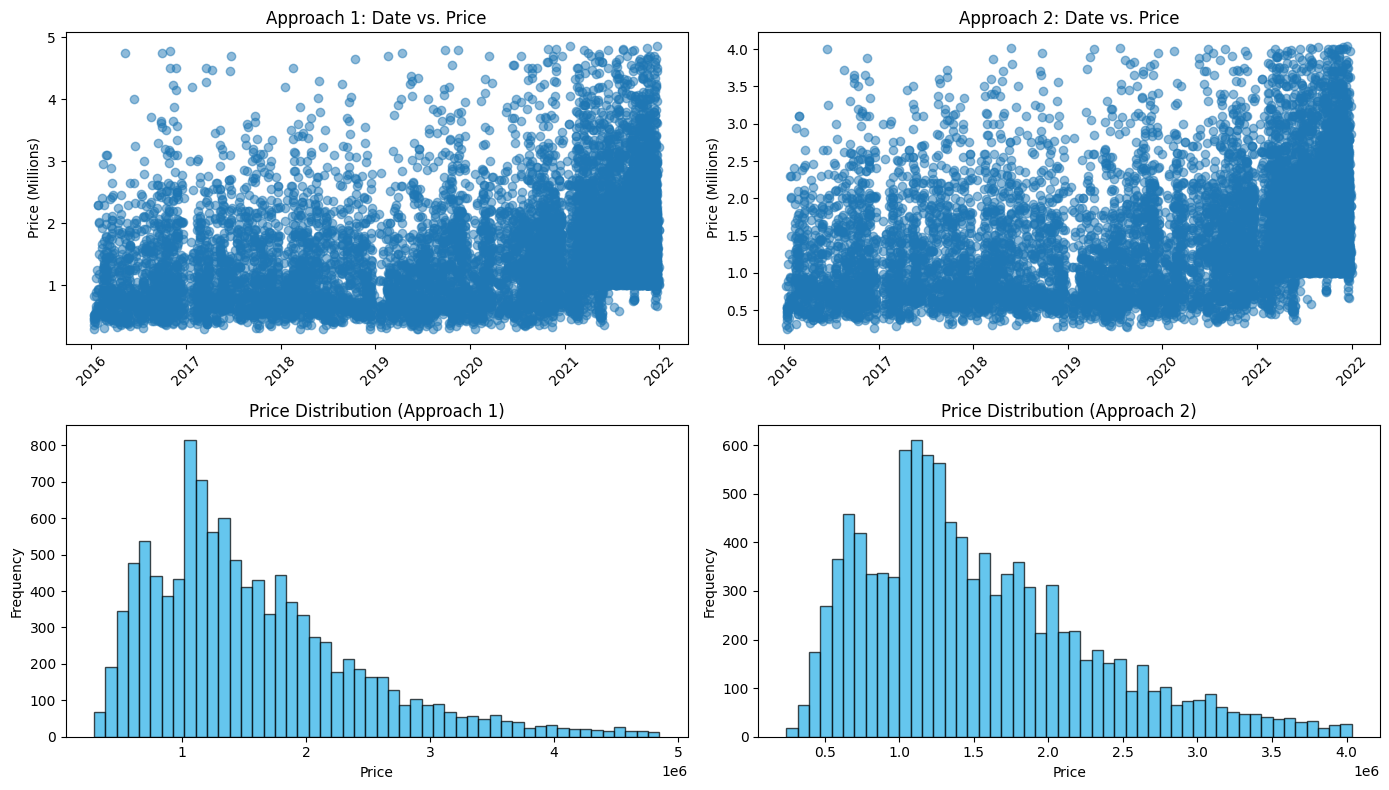

In [38]:
import matplotlib.pyplot as plt

# Assuming these DataFrames exist:
# approach1_house_category → Approach 1 (e.g. Modified Z-Score)
# approach2_house_category → Approach 2 (e.g. Isolation Forest)

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Top-Left: Scatter plot - Approach 1
axs[0, 0].scatter(approach1_house_category['date_sold'], approach1_house_category['price'] / 1e6, alpha=0.5)
axs[0, 0].set_title('Approach 1: Date vs. Price')
axs[0, 0].set_ylabel('Price (Millions)')
axs[0, 0].set_xlabel('')
axs[0, 0].tick_params(axis='x', rotation=45)

# Top-Right: Scatter plot - Approach 2
axs[0, 1].scatter(approach2_house_category['date_sold'], approach2_house_category['price'] / 1e6, alpha=0.5)
axs[0, 1].set_title('Approach 2: Date vs. Price')
axs[0, 1].set_ylabel('Price (Millions)')
axs[0, 1].set_xlabel('')
axs[0, 1].tick_params(axis='x', rotation=45)

# Bottom-Left: Histogram - Approach 1
axs[1, 0].hist(approach1_house_category['price'], bins=50, color='#24AFE7', edgecolor='black', alpha=0.7)
axs[1, 0].set_title('Price Distribution (Approach 1)')
axs[1, 0].set_xlabel('Price')
axs[1, 0].set_ylabel('Frequency')

# Bottom-Right: Histogram - Approach 2
axs[1, 1].hist(approach2_house_category['price'], bins=50, color='#24AFE7', edgecolor='black', alpha=0.7)
axs[1, 1].set_title('Price Distribution (Approach 2)')
axs[1, 1].set_xlabel('Price')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Since the second approach (IQR method) removes a substantial portion of the data, particularly houses sold in the 4M to 6M range, this could distort the overall trend in the dataset. Therefore, I decided to use the first approach, which is based on percentiles, to remove outliers. This method allows us to retain more data and better capture the general market trends.

In [39]:
domain_df=approach2_house_category

2. Data Analysis and Visualization



In this point, we try to solve the questions below:

In [40]:
#Simply house type by grouping properties into 4 groups
domain_df.loc[(domain_df['type'] == 'House'), 'segment'] = 'House'
domain_df.loc[(domain_df['type'] == 'Apartment / Unit / Flat'), 'segment'] = 'Apartment'
domain_df.loc[(domain_df['type'] == 'Vacant land'), 'segment'] = 'Vacant land'
domain_df.loc[(domain_df['type'] != 'Vacant land') &
              (domain_df['type'] != 'Apartment / Unit / Flat') &
              (domain_df['type'] != 'House'), 'segment'] = 'Others'

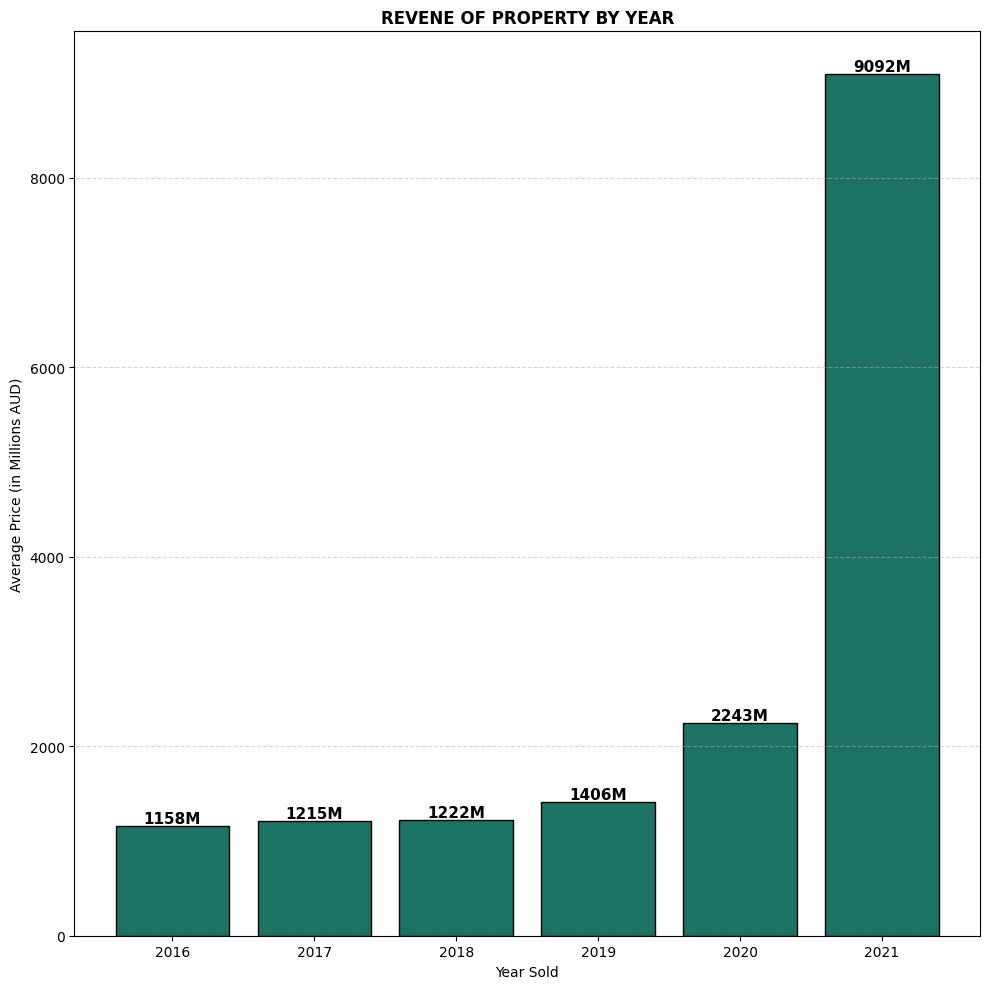

In [41]:
import matplotlib.pyplot as plt

# Group by year and calculate average price
grouped_data = domain_df[domain_df['year_sold'] != 2022].groupby('year_sold')['price'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 10))
plt.bar(grouped_data['year_sold'], grouped_data['price'] / 1e6, color='#1d7363', edgecolor='black')

# Annotate bars with price values
for i, value in enumerate(grouped_data['price']):
    plt.text(grouped_data['year_sold'][i], value / 1e6 + 0.05, f'{value/1e6:.0f}M',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Titles and labels
plt.title('REVENE OF PROPERTY BY YEAR', fontweight='bold')
plt.xlabel('Year Sold')
plt.ylabel('Average Price (in Millions AUD)')
plt.xticks(grouped_data['year_sold'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


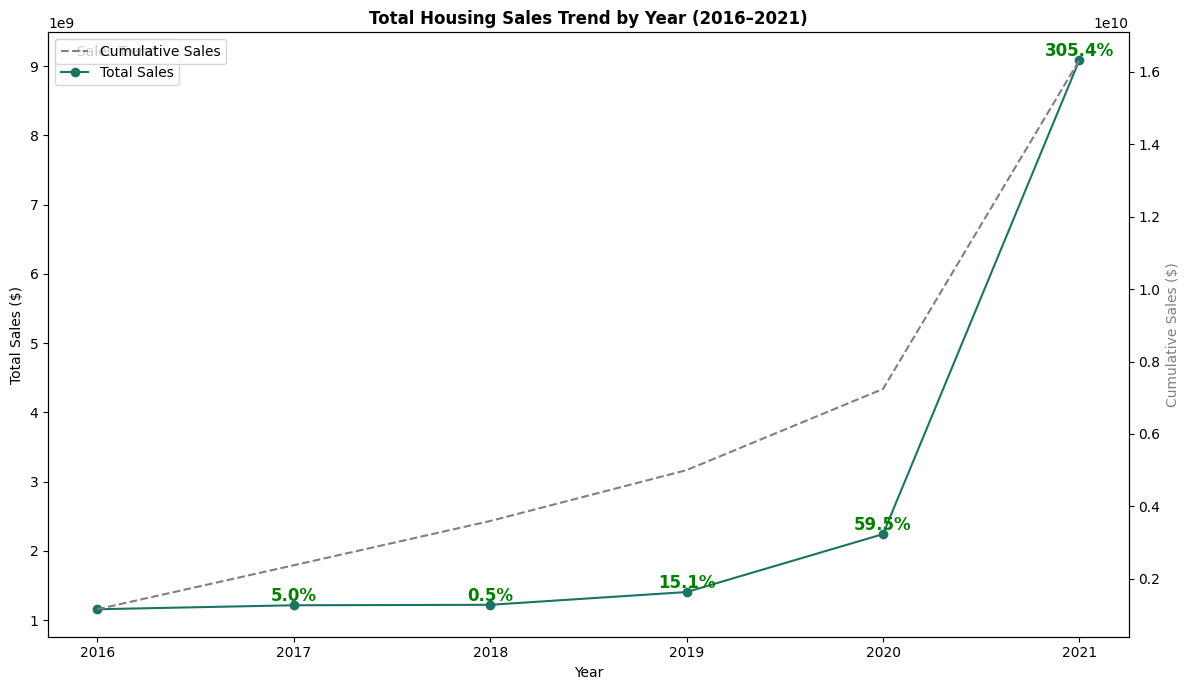

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors
main_color = '#1d7363'  # Main sales trend color
cumulative_color = 'gray'  # Cumulative sales trend

# Filter out unnecessary data
filtered_data = domain_df[domain_df['year_sold'] != 2022]  # remove 2022

# Group by year, summing up all sales
grouped_data = filtered_data.groupby(['year_sold'])['price'].sum().reset_index()

# Compute percentage change
grouped_data['pct_change'] = grouped_data['price'].pct_change() * 100

# Create figure
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot total yearly sales
ax1.plot(grouped_data['year_sold'], grouped_data['price'], marker='o', linestyle='-', 
         label='Total Sales', color=main_color)

# Annotate % change at key points (spikes or dips) with green for positive, red for negative
for idx in grouped_data.index:
    pct_change = grouped_data.loc[idx, 'pct_change']
    if abs(pct_change) > 0:
        color = 'green' if pct_change > 0 else 'red'
        ax1.text(grouped_data.loc[idx, 'year_sold'], grouped_data.loc[idx, 'price'],
                 f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=12,
                 color=color, fontweight='bold')

# Secondary y-axis for cumulative sales
ax2 = ax1.twinx()
grouped_data['cumulative_sales'] = grouped_data['price'].cumsum()
ax2.plot(grouped_data['year_sold'], grouped_data['cumulative_sales'],
         color=cumulative_color, linestyle='dashed', label='Cumulative Sales')

# Formatting
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Sales ($)')
ax2.set_ylabel('Cumulative Sales ($)', color=cumulative_color)
ax1.set_title('Total Housing Sales Trend by Year (2016–2021)', fontweight='bold')

# Set x-ticks to show only years
ax1.set_xticks(grouped_data['year_sold'])
ax1.set_xticklabels(grouped_data['year_sold'], rotation=0)

# Add legends and grid
ax1.legend(title='Sales Trend')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


- Overview of Domain Performance (2016-2021)

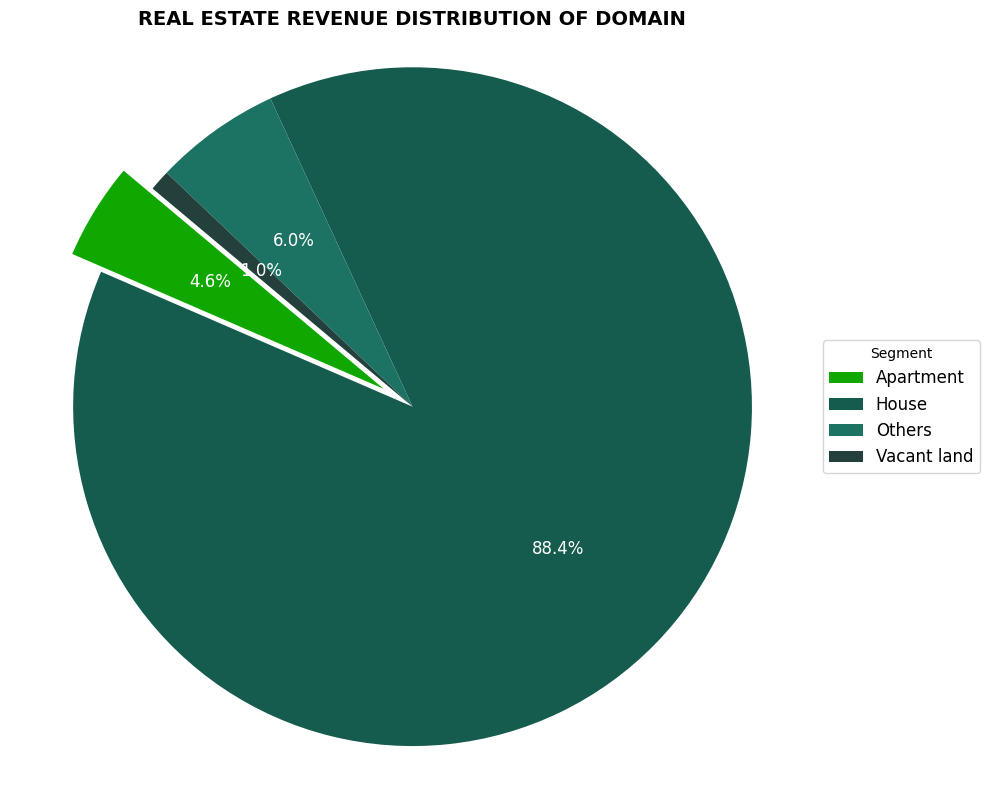

In [43]:
import matplotlib.pyplot as plt

# Grouped data by segment
grouped_data = domain_df.groupby('segment')['price'].sum().reset_index()

# Pie chart config
plt.figure(figsize=(10, 8))
explode = (0.1, 0, 0, 0)
labels = grouped_data['segment']
sizes = grouped_data['price']
colors = ['#10a800', '#155c4f', '#1d7363', '#23403d']

# Draw pie and capture returned handles
wedges, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)

# Set white color for % text
for autotext in autotexts:
    autotext.set_color('white')

# Add legend on the side
plt.legend(wedges, labels, title="Segment", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Title and formatting
plt.title('REAL ESTATE REVENUE DISTRIBUTION OF DOMAIN', fontweight='bold', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


Generally, houses have dominated the real estate market since 2016 in the Domain dataset, making up 88.7% of the company’s revenue. Apartments account for 4.5% of total sales, vacant land for 1%, and other types of housing, such as semi-attached houses and studios, for 5.8%.

The real estate industry experienced a quiet period starting in 2016, with three house types reaching their lowest points in five years. Then, it began to recover in Q2 2020 after a dramatic drop in Q1 2019 due to the pandemic’s impact. By the last quarter of 2021, every house type had hit its peak, particularly, 4.4 Billion for house, 173 Million dollars for Apartment and almost 30 Million dollars for vacant land.

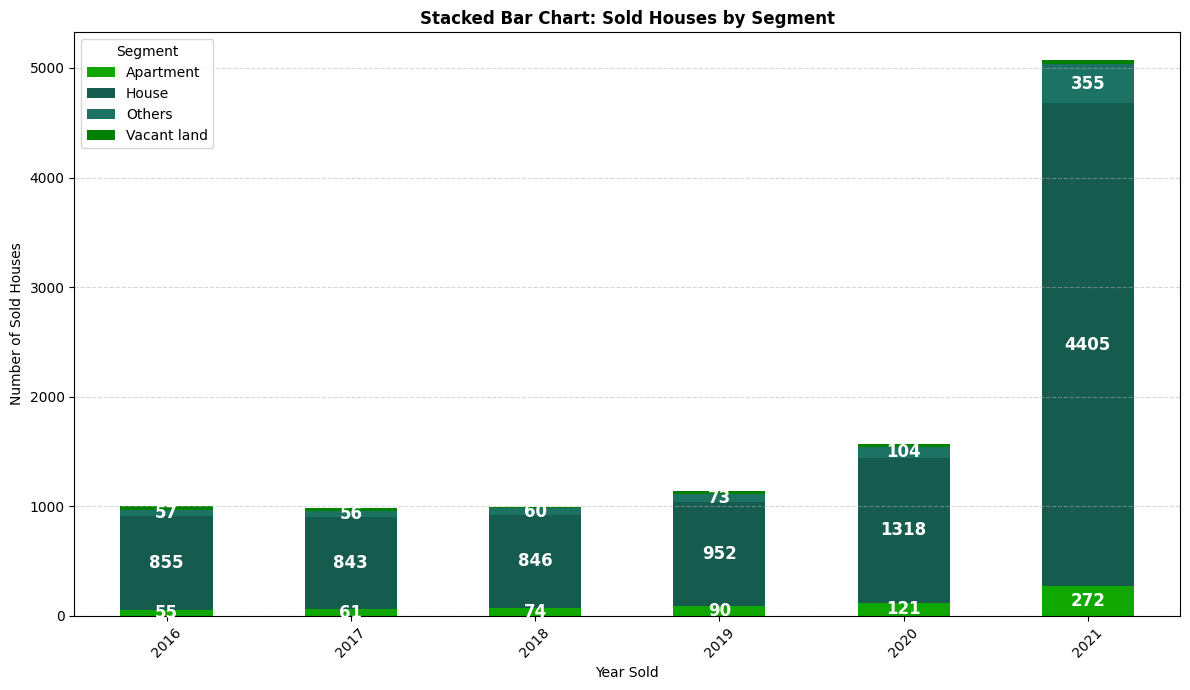

In [44]:
import matplotlib.pyplot as plt

# Group and pivot data
transactions = domain_df.groupby(['year_sold', 'segment'])['price'].count().reset_index()
transactions = transactions[transactions['year_sold'] != 2022]
transactions_pivot = transactions.pivot(index='year_sold', columns='segment', values='price').fillna(0)

# Define 4-color palette
colors_palette = ['#10a800', '#155c4f', '#1d7363', 'green']

# Create the figure
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot stacked bar chart
transactions_pivot.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=colors_palette
)

# Formatting
ax1.set_xlabel('Year Sold')
ax1.set_ylabel('Number of Sold Houses')
ax1.set_title('Stacked Bar Chart: Sold Houses by Segment', fontweight='bold')
ax1.legend(title='Segment', loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Add white labels for values >= 40
for container in ax1.containers:
    labels = [int(v) if v >= 40 else '' for v in container.datavalues]
    texts = ax1.bar_label(container, labels=labels, label_type='center', fontsize=12,  fontweight='bold')
    for text in texts:
        text.set_color('white')  # Set label color to white

# Show only Y-axis grid
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.grid(axis='x', visible=False)

plt.tight_layout()
plt.show()



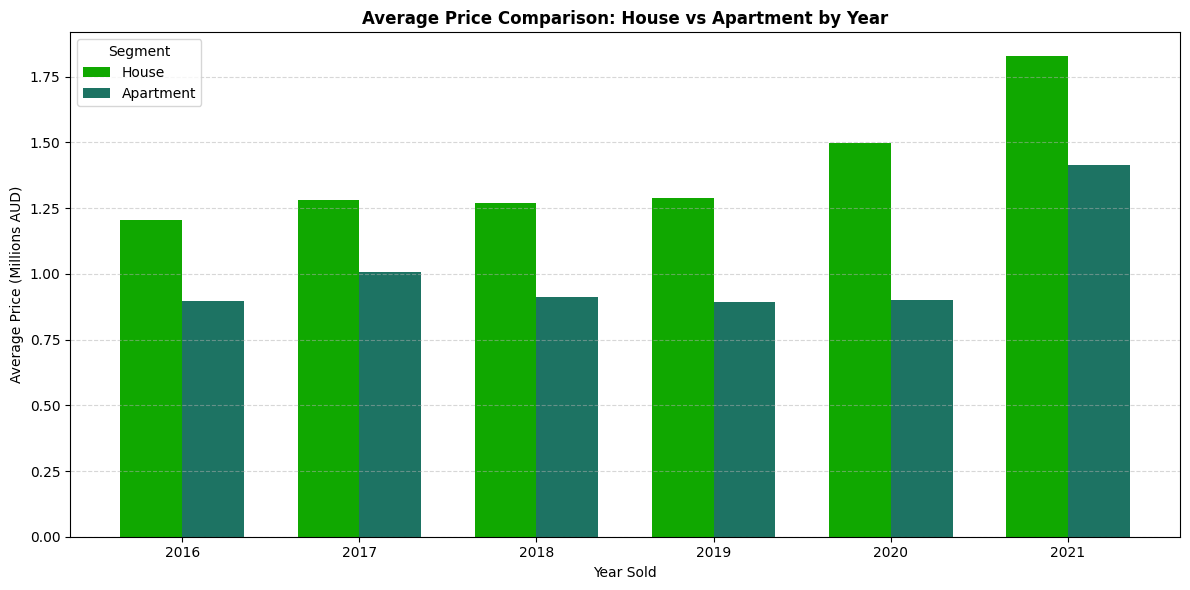

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter only House and Apartment data
filtered_df = domain_df[(domain_df['segment'].isin(['House', 'Apartment'])) & (domain_df['year_sold'] != 2022)]

# Group by year and segment to get average price
avg_price = filtered_df.groupby(['year_sold', 'segment'])['price'].mean().reset_index()

# Pivot to prepare for grouped bar chart
avg_price_pivot = avg_price.pivot(index='year_sold', columns='segment', values='price')

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
years = avg_price_pivot.index
x = range(len(years))

# Plot bars for House and Apartment
ax.bar([i - bar_width/2 for i in x], avg_price_pivot['House'] / 1e6, width=bar_width, label='House', color='#10a800')
ax.bar([i + bar_width/2 for i in x], avg_price_pivot['Apartment'] / 1e6, width=bar_width, label='Apartment', color='#1d7363')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_xlabel('Year Sold')
ax.set_ylabel('Average Price (Millions AUD)')
ax.set_title('Average Price Comparison: House vs Apartment by Year', fontweight='bold')
ax.legend(title='Segment')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


By looking at the chart, we can see that real estate transactions have dramatically increased recently, especially since 2021. Every house type has seen a significant rise, hitting a peak in the last quarter of 2021. This can be explained by the impact of the pandemic in 2019 and 2020. After that quiet period, the real estate market recovered strongly compared to 2019 and earlier.

- Average Price of Properties by TSegment through years

We can clearly see that the average prices of houses and apartments remained stable and slightly decreased from 2016 to 2018. Especially for apartments, the price dramatically went down to 0.89M in 2019, while house prices reached 1.4M that year. After 2019, both prices increased, reaching 2.04M for houses and 1.5M for apartments in 2021.

Additionally, vacant land is the most volatile segment in the real estate industry. After declining from 2017 to 2019, its price rose until 2021. This can be explained in two ways: either the real price of vacant land is increasing, or the recent transactions of vacant land are too few but involve larger amounts of money. However, in this dataset, we don’t have enough data about vacant land to draw a definitive conclusion.

- Suburb Housing Price Overview

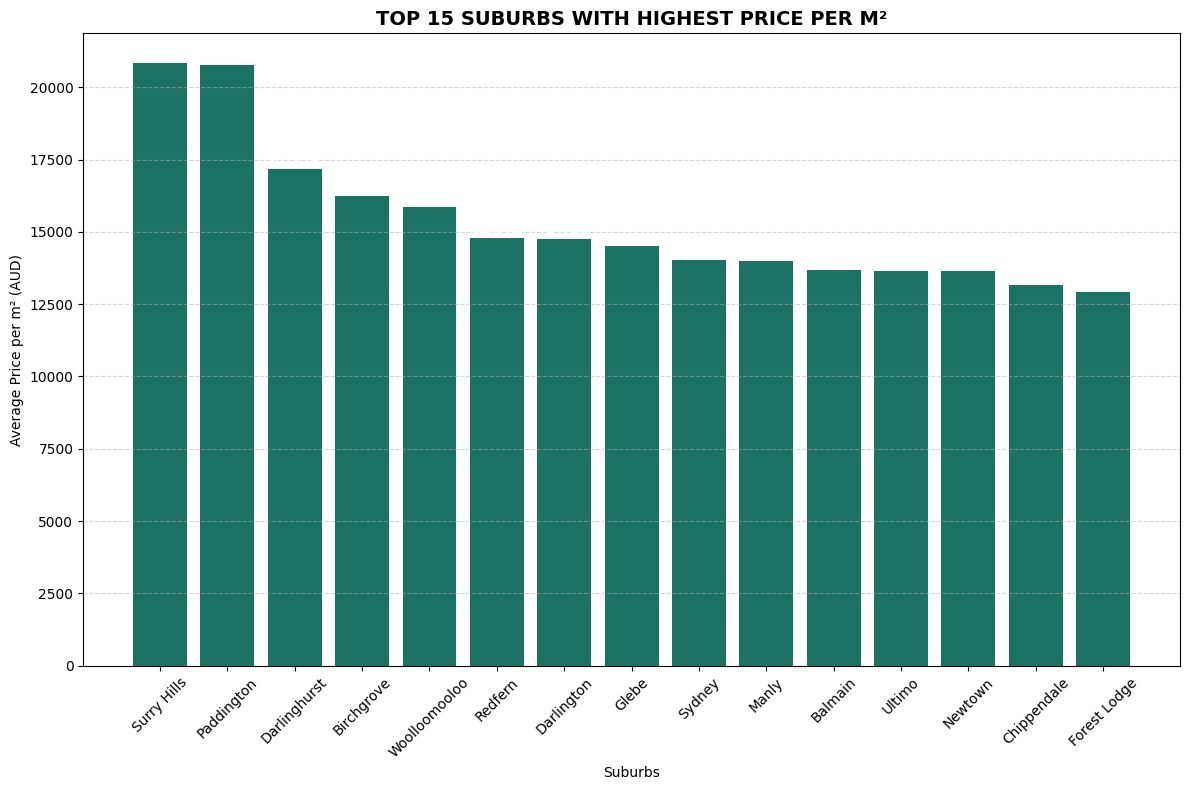

In [46]:
filtered_suburbs = domain_df.groupby('suburb').filter(lambda x: x['price'].count() >= 10)
mean_prices = (
    filtered_suburbs.groupby('suburb')['price_per_square']
    .mean()
    .reset_index()
    .sort_values(by='price_per_square', ascending=False)
    .head(15)
)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(mean_prices['suburb'], mean_prices['price_per_square'], color='#1d7363')

# Add white value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height / 1e3:.2f}K',
             ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')

# Title & axis formatting
plt.title('TOP 15 SUBURBS WITH HIGHEST PRICE PER M²', fontweight='bold', fontsize=14)
plt.xlabel('Suburbs')
plt.ylabel('Average Price per m² (AUD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The above chart reveals top 15 suburb have the highest average housing price per square, including Surry Hills, Darlinghust, Paddington, etc. Which is one of the most hustle suburb in Sydney.

- The relationship between housing price and suburb's feature (Population & Income)

In [47]:
# Step 1: Create custom color gradient
custom_cmap = LinearSegmentedColormap.from_list("custom_green_teal", ['#23403d','#1d7363','#10a800'])

# Step 2: Group and reshape data for heatmap
domain_df['suburb_med_income'] = domain_df['suburb_median_income'].apply(categorize_argument, args=(10000, 100000, 10000))
domain_df['sub_population_per_km2'] = domain_df['suburb_population_per_km2'].apply(categorize_distance, args=(0, 20000, 1000))

grouped_data = (
    domain_df
    .groupby(['suburb_med_income', 'sub_population_per_km2'])['price_per_square']
    .mean()
    .unstack()
)

# Step 3: Plot heatmap with custom color palette
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, fmt='.0f', cmap=custom_cmap,
            annot_kws={"size": 10, "color": "white"}, cbar_kws={'label': 'Price per Square (AUD)'})

# Optional: Format annotations to K
for text in plt.gca().texts:
    text.set_text(f"{float(text.get_text())/1000:.1f}K")

# Labels & title
plt.title('AVERAGE PRICE PER SQUARE BY SUBURB INCOME AND POPULATION', fontweight='bold')
plt.xlabel('Suburb Population per km²')
plt.ylabel('Suburb Median Income Range')
plt.tight_layout()
plt.show()


NameError: name 'categorize_argument' is not defined

Looking at the heat chart, we can say that the suburb income significantly impact on house pricing. The higher income area, the higher housing price with almost highest pricing house is loacted in suburb with over 50K per year income. Additionally, the price is also affect on the price with medium or large size of suburb population (>5000 people) the price is higher compare to lower that limit. Except over 80k income suburb, the population seem not impact on house price

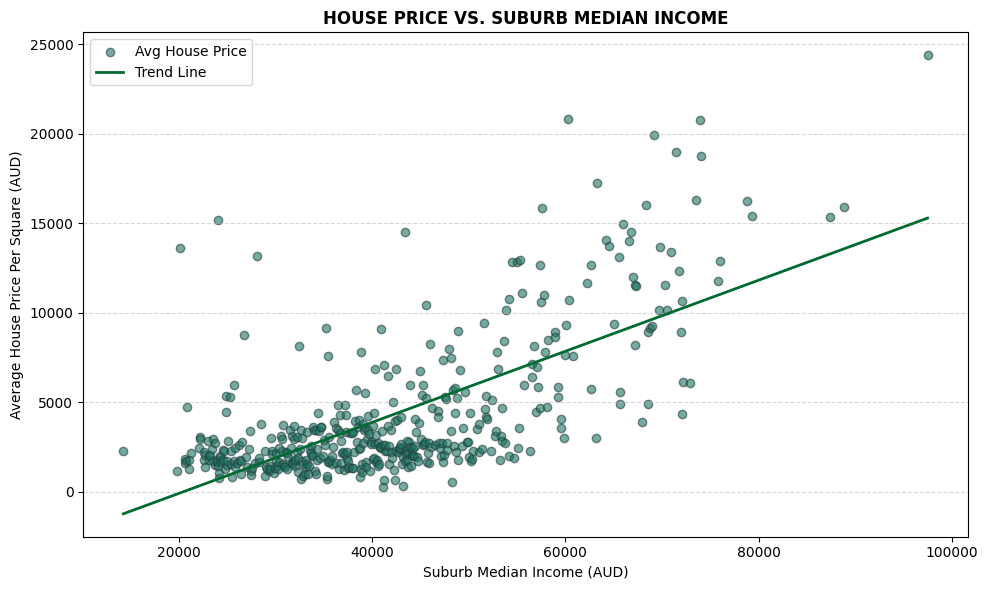

In [126]:
modified_data=domain_df
# Step 2: Group by suburb median income
grouped = modified_data.groupby('suburb_median_income')['price_per_square'].mean().reset_index()

# Step 3: Extract x and y for plotting
x = grouped['suburb_median_income']
y = grouped['price_per_square']

# Step 4: Fit regression line
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='#1d7363', edgecolors='#23403d', alpha=0.6, label='Avg House Price')
plt.plot(x, trendline, color='#006A32', linewidth=2, label='Trend Line')

# Formatting
plt.xlabel('Suburb Median Income (AUD)')
plt.ylabel('Average House Price Per Square (AUD)')
plt.title('HOUSE PRICE VS. SUBURB MEDIAN INCOME', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [140]:
from scipy.stats import pearsonr
x = domain_df['suburb_median_income']
y = domain_df['price_per_square']

correlation, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: {correlation:.3f}")

Pearson correlation coefficient: 0.447


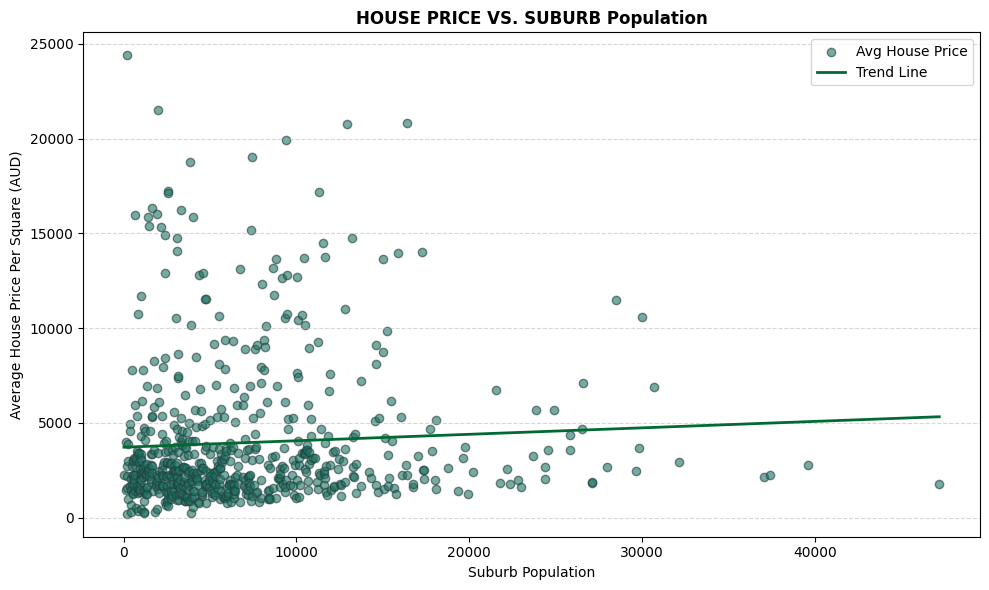

In [138]:
modified_data=domain_df
# Step 2: Group by suburb median income
grouped = modified_data.groupby('suburb_population')['price_per_square'].mean().reset_index()

# Step 3: Extract x and y for plotting
x = grouped['suburb_population']
y = grouped['price_per_square']

# Step 4: Fit regression line
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='#1d7363', edgecolors='#23403d', alpha=0.6, label='Avg House Price')
plt.plot(x, trendline, color='#006A32', linewidth=2, label='Trend Line')

# Formatting
plt.xlabel('Suburb Population')
plt.ylabel('Average House Price Per Square (AUD)')
plt.title('HOUSE PRICE VS. SUBURB Population', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [141]:
from scipy.stats import pearsonr
x = domain_df['suburb_population']
y = domain_df['price_per_square']

correlation, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: {correlation:.3f}")

Pearson correlation coefficient: 0.043


- The relationship between housing price with Distance from CBD

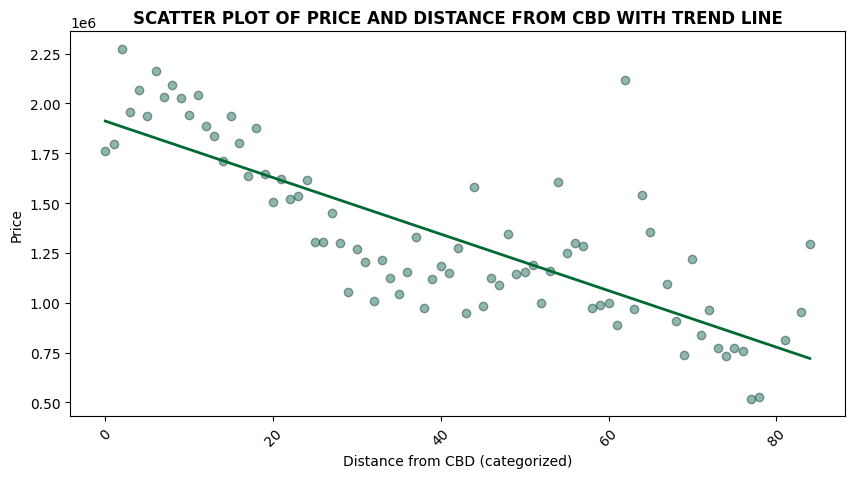

In [137]:
modified_data=domain_df
modified_data['int_distance_from_CBD']=modified_data['km_from_cbd'].apply(categorize_distance,args=(-1,100,1))
modified_data = modified_data.sort_values(by='int_distance_from_CBD')
modified_data =modified_data.groupby('int_distance_from_CBD')['price'].mean().reset_index()

plt.figure(figsize=(10,5))
x = modified_data['int_distance_from_CBD'].astype(float)
y = modified_data['price']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Plot the trend line
plt.plot(x, trendline, color='#006A32', linewidth=2)

plt.xticks(rotation=45)
plt.xlabel('Distance from CBD (categorized)')
plt.ylabel('Price')
plt.title('SCATTER PLOT OF PRICE AND DISTANCE FROM CBD WITH TREND LINE', fontweight='bold')

plt.scatter(modified_data['int_distance_from_CBD'],modified_data['price'],marker='o',color='#1d7363', edgecolors='#23403d',alpha=0.5)
plt.show()

In [142]:
from scipy.stats import pearsonr
x = domain_df['int_distance_from_CBD']
y = domain_df['price']

correlation, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: {correlation:.3f}")

Pearson correlation coefficient: -0.464


The scatter plot illustrates the relationship between property prices and their distance from the Central Business District (CBD). The trend line indicates a negative correlation, suggesting that properties closer to the CBD tend to have higher prices. This trend is consistent with urban economic theories, where proximity to central areas often commands a premium due to better access to amenities and services.

- The relationship between housing price with suburb elevation

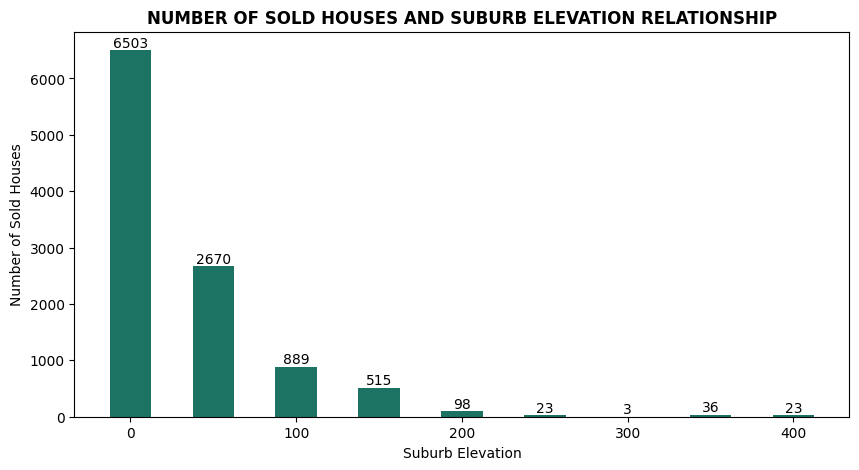

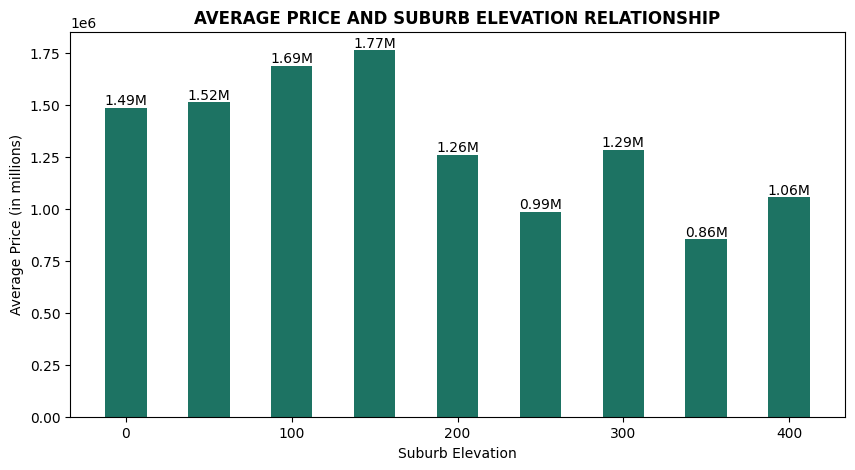

In [143]:
def plot_bar_chart(data, x_col, y_col, xlabel, ylabel, title, width=25, y_format=None):
    plt.figure(figsize=(10,5))
    plt.bar(data[x_col], data[y_col], width=width,color='#1d7363')
    for i, value in enumerate(data[y_col]):
        if y_format:
            plt.text(data[x_col][i], value, y_format(value), ha='center', va='bottom')
        else:
            plt.text(data[x_col][i], value, str(value), ha='center', va='bottom')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,fontweight='bold')
    plt.show()

# Categorize elevation
domain_df['sub_elevation'] = domain_df['suburb_elevation'].apply(categorize_distance, args=(0, 500, 50))

# Plot number of sold houses
grouped_data_count = domain_df.groupby('sub_elevation')['price'].count().reset_index()
plot_bar_chart(grouped_data_count, 'sub_elevation', 'price', 'Suburb Elevation', 'Number of Sold Houses', 'NUMBER OF SOLD HOUSES AND SUBURB ELEVATION RELATIONSHIP')

# Plot average price
grouped_data_mean = domain_df.groupby('sub_elevation')['price'].mean().reset_index()
plot_bar_chart(grouped_data_mean, 'sub_elevation', 'price', 'Suburb Elevation', 'Average Price (in millions)', 'AVERAGE PRICE AND SUBURB ELEVATION RELATIONSHIP', y_format=lambda x: f'{x/1e6:.2f}M')

The average price of houses at elevations of 150 meters and lower seems higher than those at elevations over 200 meters. Additionally, the number of houses sold decreases as elevation increases.

- Housing Price and Properties's Feature Analysis

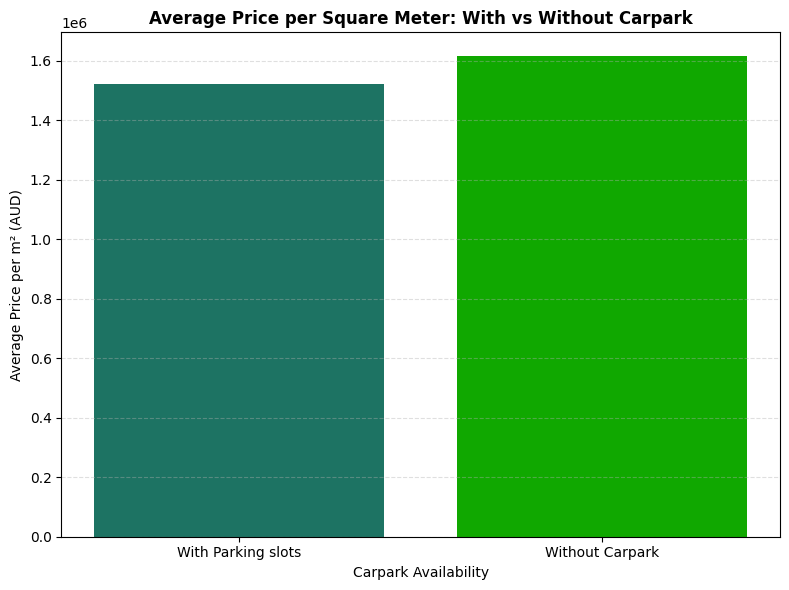

In [ ]:
import matplotlib.pyplot as plt

# Categorize carpark
domain_df.loc[(domain_df['num_parking'] < 1), 'Have carpark'] = 'Without Carpark'
domain_df.loc[(domain_df['num_parking'] >= 1), 'Have carpark'] = 'With Parking slots'

# Filter out vacant land
filtered_df = domain_df[domain_df['segment'] != 'Vacant land']

# Group and calculate average price per square
carpark_avg = filtered_df.groupby('Have carpark')['price'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(carpark_avg['Have carpark'], carpark_avg['price'], color=['#1d7363', '#10a800'])

# Add value labels in K
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height/1000:.1f}K', ha='center', va='bottom', fontsize=12, color='white', fontweight='bold')

# Labels and formatting
plt.title('Average Price per Square Meter: With vs Without Carpark', fontweight='bold')
plt.xlabel('Carpark Availability')
plt.ylabel('Average Price per m² (AUD)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [27]:
# Check data balance
count_by_carpark = filtered_df['Have carpark'].value_counts()
print(count_by_carpark)


Have carpark
With Parking slots    9995
Without Carpark        604
Name: count, dtype: int64


Data imbalanced, cannot get insight from this

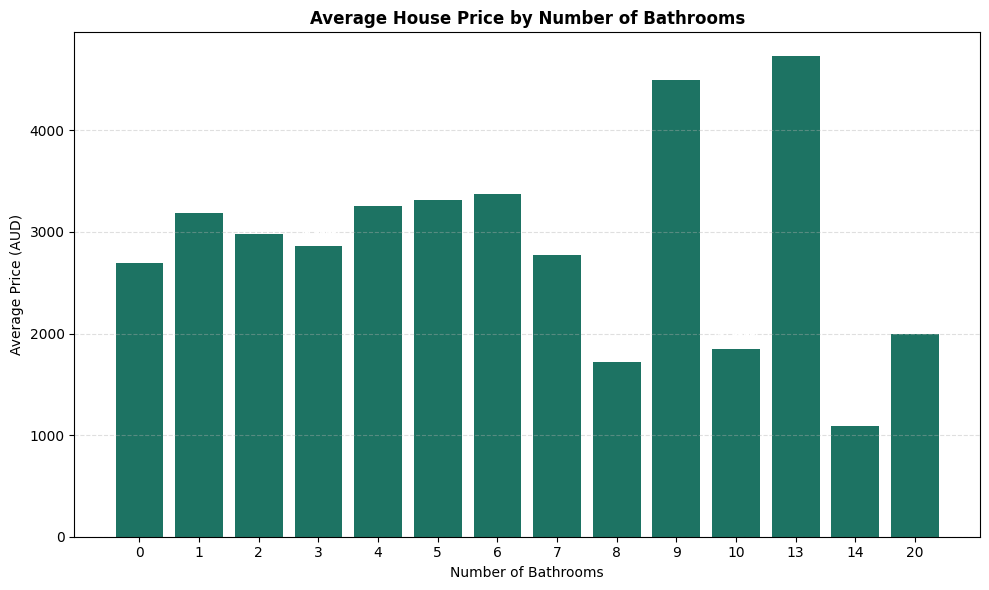

In [51]:

# Group and calculate average price per bathroom count
filtered_df = domain_df[domain_df['segment'] == 'Apartment']
filtered_df = domain_df[domain_df['segment'] == 'House']
bathroom_avg = filtered_df.groupby('num_bath')['price_per_square'].mean().reset_index()

# Sort by number of bathrooms
bathroom_avg = bathroom_avg.sort_values(by='num_bath')

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(bathroom_avg['num_bath'].astype(str), bathroom_avg['price_per_square'], color='#1d7363')

# Add value labels in K
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height/1000:.1f}K', ha='center', va='bottom',
             fontsize=12, color='white', fontweight='bold')

# Labels and formatting
plt.title('Average House Price by Number of Bathrooms', fontweight='bold')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price (AUD)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

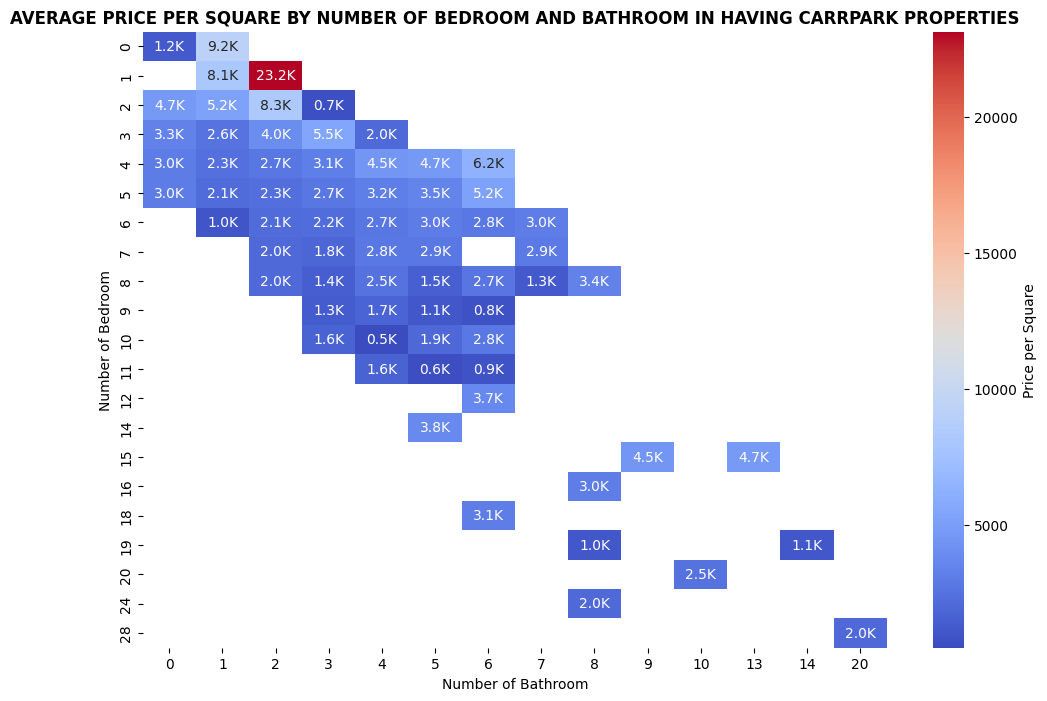

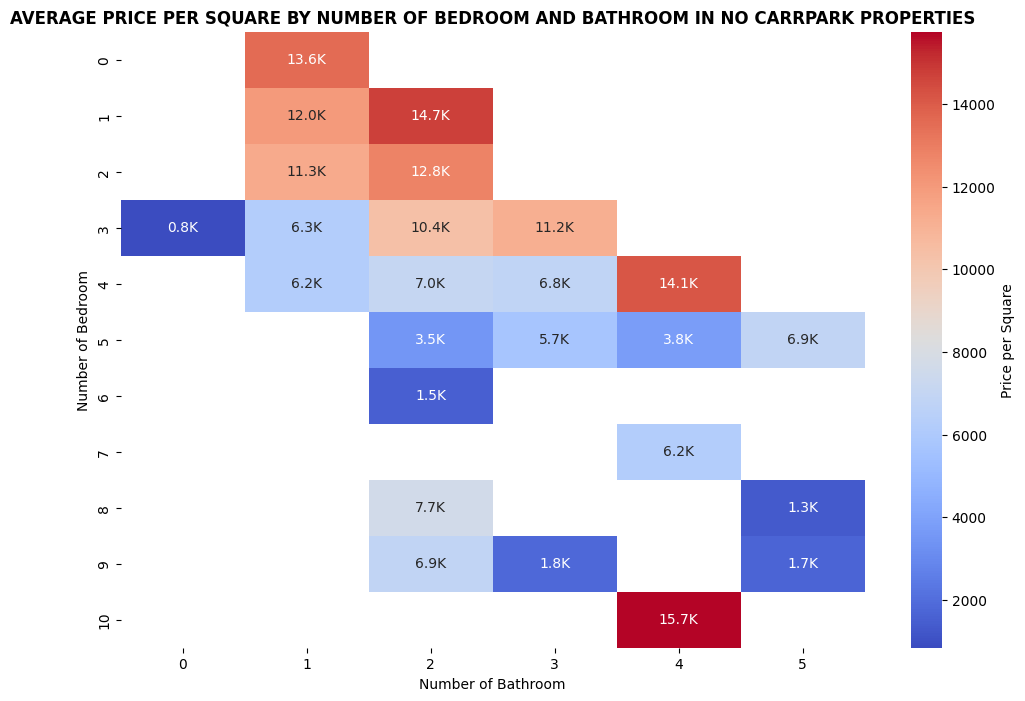

In [96]:
domain_df.loc[(domain_df['num_parking'] <1), 'Have carpark'] = 'No'
domain_df.loc[(domain_df['num_parking'] >=1), 'Have carpark'] = 'Yes'

grouped_data1 = domain_df[(domain_df['segment']!='Vacant land') & (domain_df['Have carpark']=='Yes')].groupby(['num_bed', 'num_bath'])['price_per_square'].mean().unstack()
grouped_data2 = domain_df[(domain_df['segment']!='Vacant land') & (domain_df['Have carpark']=='No')].groupby(['num_bed', 'num_bath'])['price_per_square'].mean().unstack()

# Create the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data1, annot=True, fmt='', cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={'label': 'Price per Square'})
for text in plt.gca().texts:
    text.set_text(custom_annot(float(text.get_text())))
plt.title('AVERAGE PRICE PER SQUARE BY NUMBER OF BEDROOM AND BATHROOM IN HAVING CARRPARK PROPERTIES', fontweight='bold')
plt.xlabel('Number of Bathroom')
plt.ylabel('Number of Bedroom')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data2, annot=True, fmt='', cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={'label': 'Price per Square'})
for text in plt.gca().texts:
    text.set_text(custom_annot(float(text.get_text())))
plt.title('AVERAGE PRICE PER SQUARE BY NUMBER OF BEDROOM AND BATHROOM IN NO CARRPARK PROPERTIES', fontweight='bold')
plt.xlabel('Number of Bathroom')
plt.ylabel('Number of Bedroom')
plt.show()

The price of properties without a carpark depends on the number of bedrooms and bathrooms. The most expensive combinations are 1 to 3 bathrooms and 0 to 2 bedrooms. However, there are exceptions, such as a 12-bedroom, 6-bathroom house priced at $16.2K per m² and a 4-bedroom, 4-bathroom house priced at $11.2K per m²
For properties with a carpark, the prices are notable, with a 1-bedroom, 2-bathroom property having a mean value of $19.2K per m².


- Geographical Chart of Housing Price in Sydney

In [97]:
import folium
mean_prices = domain_df.groupby(['suburb', 'suburb_lat', 'suburb_lng'])['price'].mean().reset_index()

# Create a map centered around the average location
map_center = [mean_prices['suburb_lat'].mean(), mean_prices['suburb_lng'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each suburb with mean housing price
for _, row in mean_prices.iterrows():
    folium.Marker(
        location=[row['suburb_lat'], row['suburb_lng']],
        popup=f"{row['suburb']}: ${row['price']:,.2f}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

title_html = '''
             <div style="position: fixed; 
                         top: 10px; left: 400px; width: 100%; height: 50px; 
                         z-index:9999; font-size:24px;">
                         <b>Mean Housing Prices by Suburb</b></div>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Save the map to an HTML file
m.save('mean_housing_price_map.html')

# Display the map in a Jupyter Notebook (if you're using one)
m

IV. Data Prediction
1. Data Preparation for predictor

In [98]:
#ALL_Types_of_Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from time import time
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima

prediction_df= domain_df

#Label  
prediction_df['suburb'] = prediction_df['suburb'].astype('category').cat.codes
encoder = LabelEncoder()
prediction_df['house_type'] = encoder.fit_transform(prediction_df['type'])


#Feature Engineering for suburb average price following by Month-Year
# Grouping by suburb, year_sold, and month_sold to calculate the mean price
group_data_mean = prediction_df.groupby(['suburb', 'year_sold', 'month_sold'])['price'].mean().reset_index()
group_data_mean.rename(columns={'price': 'suburb_mean_price'}, inplace=True)
prediction_df = pd.merge(prediction_df, group_data_mean, on=['suburb', 'year_sold', 'month_sold'])

df=prediction_df.sort_values(by='date_sold')
df['timestemp']=df['date_sold'].rank(ascending=True)

# Ensure the target variable is `price` and remove unnecessary columns
features = ['suburb_mean_price', 'num_bath', 'num_bed', 'num_parking', 'property_size','timestemp',
            'suburb_population', 'suburb_median_income', 'suburb_sqkm', 'suburb_elevation', 'cash_rate','property_inflation_index','km_from_cbd','house_type']
X = df[features]
y = df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)



2. Prediction Model
- Random Forest Regressor Model

In [99]:

rand_regr = RandomForestRegressor(n_estimators=400,random_state=0)
start = time()
rand_regr.fit(X_train, y_train)
end=time()
train_time_rand=end-start
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions,y_test)

KeyboardInterrupt: 

Gradient Boosting Regressor Model

In [28]:
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5,min_samples_split=2,learning_rate=0.01).fit(X_train, y_train)
end=time()
train_time_g=end-start
gradient=est.score(X_test,y_test)
pred = est.predict(X_test)
exp_est = explained_variance_score(pred,y_test)

AdaBoosting Regressor Model

In [29]:
start = time()
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(X_train, y_train)
end=time()
train_time_ada=end-start
pred=ada.predict(X_test)
adab=ada.score(X_test,y_test)
predict = ada.predict(X_test)
exp_ada = explained_variance_score(predict,y_test)

- Evaluation Metrics:

In [30]:
# Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','AdaBoost','Random Forest'],
    'Score': [gradient,adab,random],
     'Variance Score': [exp_est,exp_ada,exp_rand]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
0,Gradient Boosting,0.869197,0.837747
2,Random Forest,0.855011,0.829653
1,AdaBoost,0.830960,0.805608


- LSTM model

In [ ]:

# Reshape X for LSTM
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])  # (samples, timesteps, features)
y_lstm = y_scaled

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_lstm, y_lstm, epochs=10, batch_size=16, verbose=1)

# Predict prices
y_pred_scaled = model.predict(X_lstm)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Inverse transform to get original scale
y_actual = scaler_y.inverse_transform(y_lstm)       # Inverse transform actual prices for comparison

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Actual vs Predicted Prices (LSTM Model)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)

# Print metrics
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")

NameError: name 'X_scaled' is not defined

- ARIMA model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=269798.305, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=267948.222, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=266388.575, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=269796.305, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.49 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=266386.927, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=2.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=2.45 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=267946.223, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=5.30 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 37.453 seconds
Best ARIMA order: (0, 1, 1)


C:\Users\UOW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\UOW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\UOW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. fore

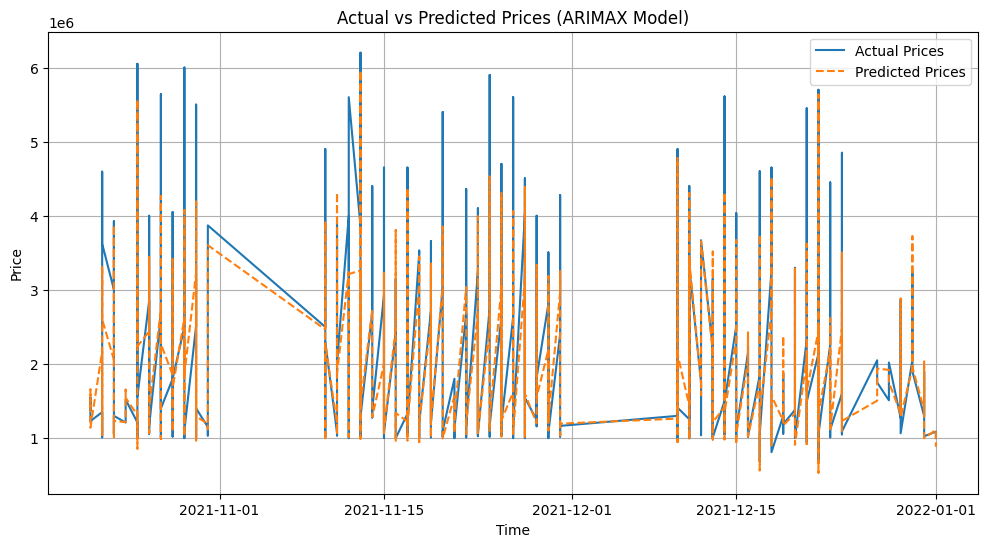

R-squared (R²): 0.7626264466072294
Mean Absolute Error (MAE): 246899.93365036187
Root Mean Square Error (RMSE): 398986.020945228


In [217]:
#Define dataset again with date_sold index
df = prediction_df.sort_values(by='date_sold')  # Sort by the date_sold column
df.set_index('date_sold', inplace=True)  # Set the date_sold as the index for proper ordering

features = ['suburb_mean_price', 'num_bath', 'num_bed', 'num_parking', 'property_size',
            'suburb_population', 'suburb_median_income', 'suburb_sqkm', 'suburb_elevation',
            'cash_rate', 'property_inflation_index', 'km_from_cbd', 'house_type']
X = df[features]
y = df['price']

# Train-test split
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Automatically determine (p, d, q)
auto_model = auto_arima(y_train, exogenous=X_train, seasonal=False, trace=True,
                         error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the best order
print("Best ARIMA order:", auto_model.order)

# Fit the SARIMAX model with the selected (p, d, q)
model = SARIMAX(y_train, exog=X_train, order=(1,1,4))
model_fit = model.fit()
# Fit the ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1))  # Adjust (p, d, q) as necessary
model_fit = model.fit(disp=False)

# Predict on the test set
y_pred = model_fit.forecast(steps=len(X_test), exog=X_test)

# Plot actual vs predicted prices, ensuring chronological order
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices', linestyle='--')
plt.title('Actual vs Predicted Prices (ARIMAX Model)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")

V. CONCLUSION

The analysis of housing prices reveals several key insights. Firstly, there is a clear correlation between suburb income and housing prices, with higher-income areas generally commanding higher prices. This trend is particularly evident in suburbs where the median income exceeds $50K per year. Additionally, the population size of a suburb also influences housing prices, with medium to large populations (over 5,000 people) associated with higher prices, except in the highest income brackets where population size seems less impactful.

The real estate market experienced a quiet period from 2016, with a notable drop in Q1 2019 due to the pandemic. However, since Q2 2020, the market has shown a strong recovery, peaking in the last quarter of 2021 across all house types.

Furthermore, properties without carparks show a dependency on the number of bedrooms and bathrooms, with certain combinations being more expensive. Properties with carparks, particularly those with 1 bedroom and 2 bathrooms, have notably high prices.

Lastly, elevation also plays a role in housing prices, with properties at elevations of 150 meters and lower being more expensive on average than those at higher elevations. The number of houses sold also decreases as elevation increases.

Overall, Gradient Boosting is the most suitable model in this case because the five-year cycle of data is not well-aligned with a linear model, especially during a period of significant change in NSW, marked by high inflation and the impacts of the COVID-19 pandemic. The non-linear trends during this time make it difficult for linear regression to capture sudden shifts. Additionally, Random Forest can account for various factors by identifying and weighing the importance of different variables over time, making it more suitable for long-term analysis.